# Import libraries and load data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("noisy_regression_data.csv")
X = data["Feature"].values.reshape(-1, 1)
y = data["Target"].values.reshape(-1, 1)


# Normalize X and y with separate scalers
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Hyperparameters & Optimizer State Initialization

In [53]:
# Learning rates per optimizer
epochs = 100
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999
lr_sgd = 0.01
lr_momentum = 0.01
lr_adagrad = 0.01
lr_rmsprop = 0.001
lr_adam = 0.01

# Reset function for initializing weights and states
def reset():
    rng = np.random.default_rng(42)
    w = rng.normal(0, 0.01, size=(2, 1))  # Random Gaussian init
    v = np.zeros((2, 1))  # Velocity (for momentum-based methods)
    s = np.zeros((2, 1))  # Squared gradients (for adaptive methods)
    return w, v, s, []

# Batch Gradient Descent

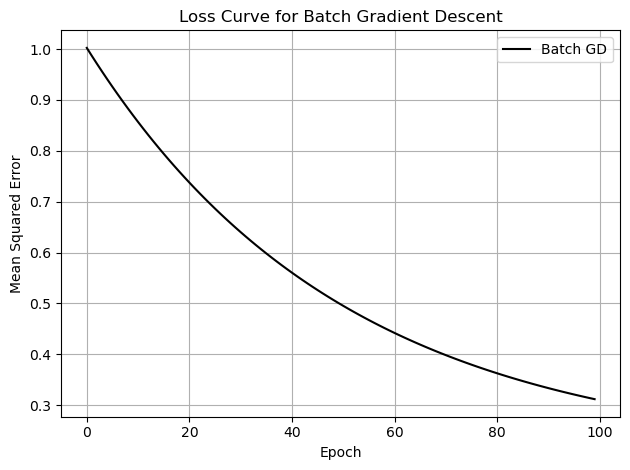

In [56]:
# --- Batch Gradient Descent ---
loss_history_batch = []
w, v, s, _ = reset()

for epoch in range(epochs):
    y_pred = X_b @ w
    grad = X_b.T @ (y_pred - y) / len(y)
    w -= lr_sgd * grad  # You can use lr_batch if you want to distinguish it
    loss = np.mean((X_b @ w - y) ** 2)
    loss_history_batch.append(loss)

# --- Plotting ---
plt.plot(loss_history_batch, label="Batch GD", color='black')
plt.title("Loss Curve for Batch Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Stochastic Gradient Descent

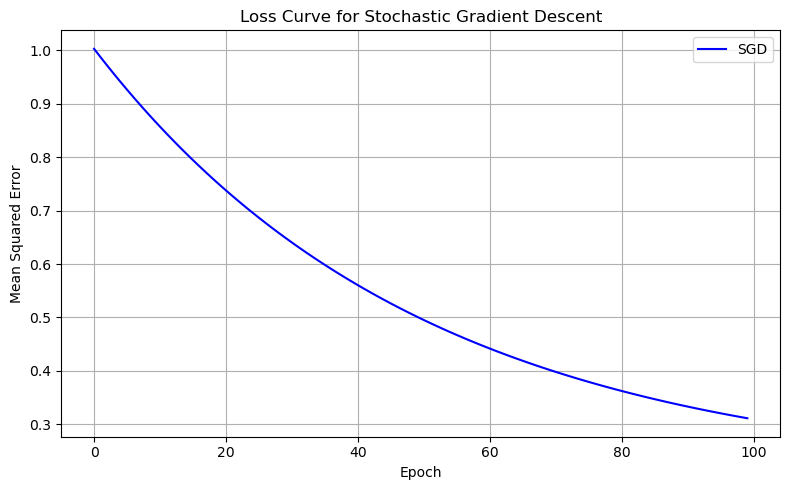

In [59]:
# --- SGD Training and Loss Recording ---
w, v, s, loss_sgd = reset()
for epoch in range(epochs):
    # Compute gradient of MSE loss
    grad = X_b.T @ (X_b @ w - y) / len(y)
    
    # Parameter update (SGD)
    w -= lr_sgd * grad
    
    # Compute and store current loss
    loss = np.mean((X_b @ w - y) ** 2)
    loss_sgd.append(loss)

# --- Plotting the Loss Curve ---
plt.figure(figsize=(8, 5))
plt.plot(loss_sgd, label="SGD", color='blue')
plt.title("Loss Curve for Stochastic Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Mini-batch Gradient Descent

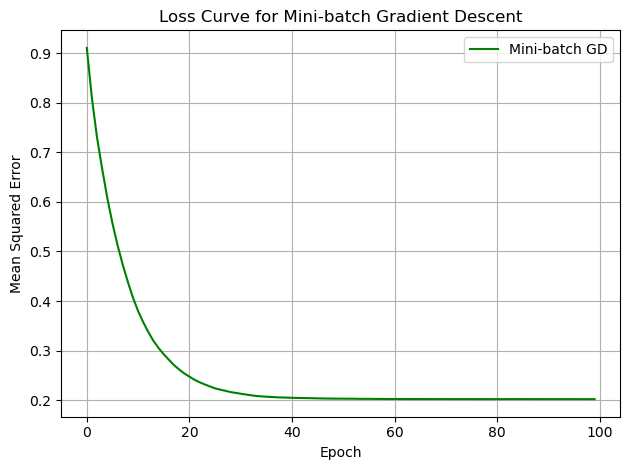

In [62]:
# --- Mini-batch Gradient Descent ---
loss_history_minibatch = []
w, v, s, _ = reset()
batch_size = 32  # Set batch size if not already defined

for epoch in range(epochs):
    indices = np.random.permutation(len(X_b))  # Shuffle data each epoch
    for i in range(0, len(X_b), batch_size):
        idx = indices[i:i + batch_size]
        xb, yb = X_b[idx], y[idx]
        grad = xb.T @ (xb @ w - yb) / len(xb)
        w -= lr_sgd * grad  # Use optimizer-specific learning rate

    # Compute loss after each epoch (on full data)
    loss = np.mean((X_b @ w - y) ** 2)
    loss_history_minibatch.append(loss)

# --- Plotting ---
plt.plot(loss_history_minibatch, label="Mini-batch GD", color='green')
plt.title("Loss Curve for Mini-batch Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Momentum

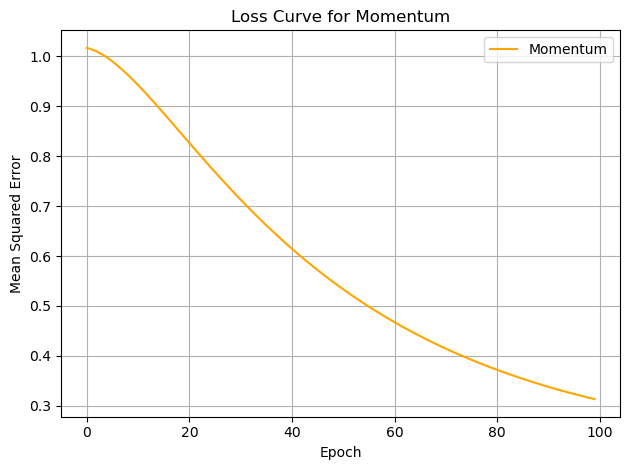

In [65]:
# --- Momentum Gradient Descent ---
momentum = 0.9
loss_history_momentum = []
w, v, s, _ = reset()

for epoch in range(epochs):
    grad = X_b.T @ (X_b @ w - y) / len(y)
    v = momentum * v + (1 - momentum) * grad  # Correct: Exponentially weighted moving average
    w -= lr_momentum * v  # Use the correct learning rate for momentum
    loss = np.mean((X_b @ w - y) ** 2)
    loss_history_momentum.append(loss)

# --- Plotting ---
plt.plot(loss_history_momentum, label="Momentum", color='orange')
plt.title("Loss Curve for Momentum")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Adagrad

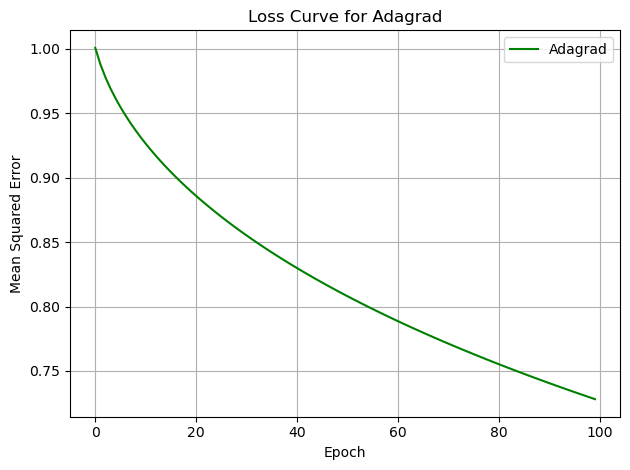

In [68]:
# --- Adagrad Optimizer ---
loss_history_adagrad = []
w, v, s, _ = reset()

for epoch in range(epochs):
    grad = X_b.T @ (X_b @ w - y) / len(y)
    s += grad ** 2  # Accumulate squared gradients
    w -= lr_adagrad * grad / (np.sqrt(s) + epsilon)  # Use optimizer-specific LR
    loss = np.mean((X_b @ w - y) ** 2)
    loss_history_adagrad.append(loss)

# --- Plotting ---
plt.plot(loss_history_adagrad, label="Adagrad", color='green')
plt.title("Loss Curve for Adagrad")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# RMSProp

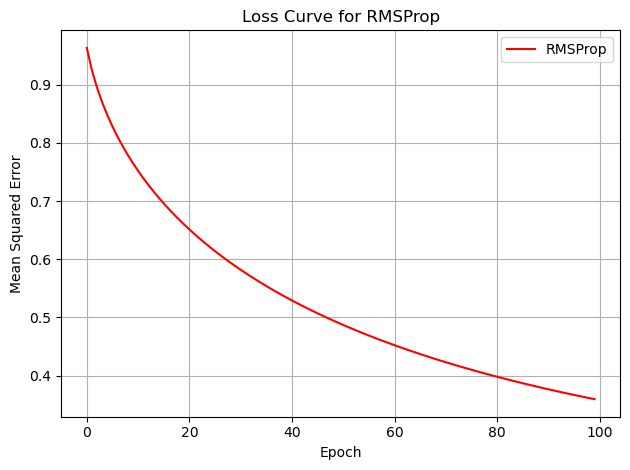

In [71]:
# --- RMSProp Optimizer ---
loss_history_rmsprop = []
w, v, s, _ = reset()

for epoch in range(epochs):
    y_pred = X_b @ w
    grad = X_b.T @ (y_pred - y) / len(y)
    s = beta2 * s + (1 - beta2) * grad ** 2  # Exponential moving average of squared gradients
    w -= lr_rmsprop * grad / (np.sqrt(s) + epsilon)  # Optimizer-specific learning rate
    loss = np.mean((X_b @ w - y) ** 2)
    loss_history_rmsprop.append(loss)

# --- Plotting ---
plt.plot(loss_history_rmsprop, label="RMSProp", color='red')
plt.title("Loss Curve for RMSProp")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Adam

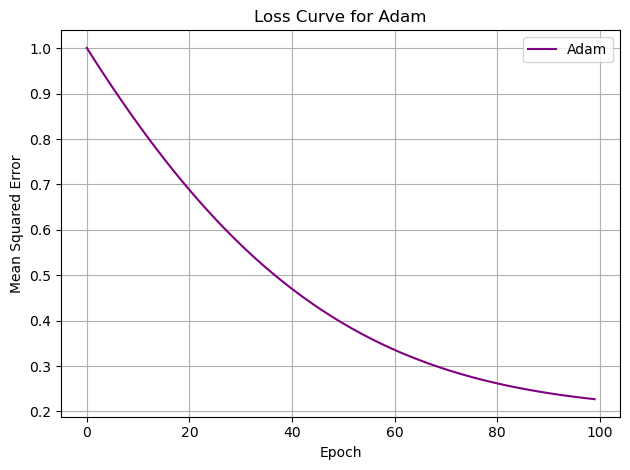

In [74]:
# --- Adam Optimizer ---
lr_adam = 0.01  # Tuned for this task
loss_history_adam = []
w, v, s, _ = reset()

for epoch in range(1, epochs + 1):
    grad = X_b.T @ (X_b @ w - y) / len(y)
    v = beta1 * v + (1 - beta1) * grad
    s = beta2 * s + (1 - beta2) * grad ** 2
    v_corr = v / (1 - beta1 ** epoch)
    s_corr = s / (1 - beta2 ** epoch)
    w -= lr_adam * v_corr / (np.sqrt(s_corr) + epsilon)
    loss = np.mean((X_b @ w - y) ** 2)
    loss_history_adam.append(loss)

# --- Plotting ---
plt.plot(loss_history_adam, label="Adam", color='purple')
plt.title("Loss Curve for Adam")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Final Plot

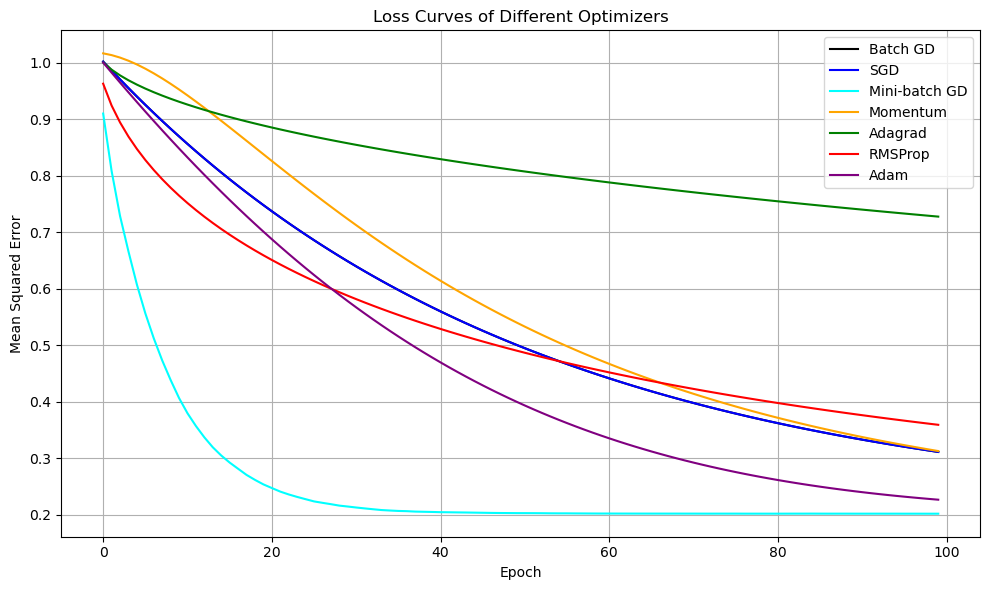

In [84]:
import os

# Ensure 'results' folder exists
os.makedirs("results", exist_ok=True)

plt.figure(figsize=(10, 6))
plt.plot(loss_history_batch, label='Batch GD', color='black')
plt.plot(loss_sgd, label='SGD', color='blue')
plt.plot(loss_history_minibatch, label='Mini-batch GD', color='cyan')
plt.plot(loss_history_momentum, label='Momentum', color='orange')
plt.plot(loss_history_adagrad, label='Adagrad', color='green')
plt.plot(loss_history_rmsprop, label='RMSProp', color='red')
plt.plot(loss_history_adam, label='Adam', color='purple')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curves of Different Optimizers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/loss_curves.png", dpi=300, bbox_inches='tight')
plt.show()



# Final Mean Squared Error (MSE) Comparison Across Optimizers

In [80]:
print("Final MSE per Optimizer:")
print(f"Batch GD     : {loss_history_batch[-1]:.4f}")
print(f"SGD          : {loss_sgd[-1]:.4f}")
print(f"Mini-batch GD: {loss_history_minibatch[-1]:.4f}")
print(f"Momentum     : {loss_history_momentum[-1]:.4f}")
print(f"Adagrad      : {loss_history_adagrad[-1]:.4f}")
print(f"RMSProp      : {loss_history_rmsprop[-1]:.4f}")
print(f"Adam         : {loss_history_adam[-1]:.4f}")


Final MSE per Optimizer:
Batch GD     : 0.3116
SGD          : 0.3116
Mini-batch GD: 0.2022
Momentum     : 0.3131
Adagrad      : 0.7281
RMSProp      : 0.3596
Adam         : 0.2270
